# Table of Contents

### <a href='#intro'>-> Introduction</a>
### <a href='#prelim'>-> Preliminary Wrangling</a>
### <a href='#explore'>-> Univariate, Bivariate, and Multivariate Data Exploration</a>
### <a href='#conclude'>-> Conclusions</a>
### <a href='#glosary'>-> Glosary</a>

<a id='intro'></a>
## Introduction

- The data set contains 113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others.
- The data dictionary <strong>(df_desc)</strong> explains the variables in the data set.

<a id='prelim'></a>
## Preliminary Wrangling

The Wrangling process will be carried out in the fashion
- Gather 
- Assess
    - Visual
    - Programmatic
- Clean
    - Define
    - Code
    - Test

##### Import modules

In [3]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import sys
import os
import warnings; warnings.simplefilter('ignore')

%matplotlib inline

### Gather

In [4]:
df = pd.read_csv('prosperLoanData.csv')
df_desc = pd.read_csv('Prosper Loan Data - Variable Definitions - Sheet1.csv')

### Assess

In [5]:
df.tail(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### Clean

#### Issues to be fixed
##### Tidy Issues
1. Create a new dataframe from columns of Interest
2. Create a new feature `CreditScoreRange` from `CreditScoreRangeUpper` and `CreditScoreRangeLower`

##### Quality Issues

### Issue 1


#### Define
- Create a new data frame ```df_new``` from the columns of Interest
<br>

- <strong>columns of interest</strong>
    - CreditGrade
    - Term
    - LoanStatus
    - ClosedDate
    - BorrowerAPR
    - LenderYield
    - ListingCategory (numeric)
    - BorrowerState
    - Occupation
    - EmploymentStatus
    - EmployementStatusDuration
    - IsBorrowerHomeowner
    - CreditScoreRange = `f"${CreditScoreRangeLower} - ${CreditScoreRangeUpper}"`
    - CurrentDelinquencies
    - AmountDelinquent
    - DelinquuenciesLast7Years
    - RevolvingCreditBalance
    - BankcardUtilization
    - AvalibleBankcardCredit
    - DebtToIncomeRatio
    - IncomeRange
    - IncomeVerifiable
    - StatedMonthlyIncome
    - LoanOriginalAmount
    - LoanOriginationDate
    - LoanOriginationQuarter
    - MonthlyLoanPayment
    - LP_ServiceFees

#### Code

In [8]:
columnsOfInterest = ['CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MonthlyLoanPayment', 'LP_ServiceFees']
df_new = df[columnsOfInterest].copy()

##### Test

In [9]:
df_new.head()

,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),BorrowerState,Occupation,...,AvailableBankcardCredit,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_ServiceFees
0,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,0,CO,Other,...,1500.0,0.17,"$25,000-49,999",True,3083.333333,9425,2007-09-12 00:00:00,Q3 2007,330.43,-133.18
1,NaN,36,Current,NaN,0.12016,0.0920,0.0820,2,CO,Professional,...,10266.0,0.18,"$50,000-74,999",True,6125.000000,10000,2014-03-03 00:00:00,Q1 2014,318.93,0.00
2,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,0,GA,Other,...,NaN,0.06,Not displayed,True,2083.333333,3001,2007-01-17 00:00:00,Q1 2007,123.32,-24.20
3,NaN,36,Current,NaN,0.12528,0.0974,0.0874,16,GA,Skilled Labor,...,30754.0,0.15,"$25,000-49,999",True,2875.000000,10000,2012-11-01 00:00:00,Q4 2012,321.45,-108.01
4,NaN,36,Current,NaN,0.24614,0.2085,0.1985,2,MN,Executive,...,695.0,0.26,"$100,000+",True,9583.333333,15000,2013-09-20 00:00:00,Q3 2013,563.97,-60.27


In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CreditGrade                28953 non-null   object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   ClosedDate                 55089 non-null   object 
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   LenderYield                113937 non-null  float64
 7   ListingCategory (numeric)  113937 non-null  int64  
 8   BorrowerState              108422 non-null  object 
 9   Occupation                 110349 non-null  object 
 10  EmploymentStatus           111682 non-null  object 
 11  EmploymentStatusDuration   106312 non-null  float64
 12  IsBorrowerHomeowner        113937 non-null  bool   
 13  CreditScoreRangeLower      11

### Issue 2

#### Define
<br>
- Create a new feature `CreditScoreRange` from `CreditScoreRangeUpper` and `CreditScoreRangeLower`

#### Code

In [11]:
rangeVal = [f"${i} - {j}" for i,j in zip(df_new['CreditScoreRangeLower'], df_new['CreditScoreRangeUpper'])]
df_new['CreditScoreRange'] = rangeVal

#### Test

In [12]:
df_new['CreditScoreRange'].unique()

array(['$640.0 - 659.0', '$680.0 - 699.0', '$480.0 - 499.0',
       '$800.0 - 819.0', '$740.0 - 759.0', '$700.0 - 719.0',
       '$820.0 - 839.0', '$760.0 - 779.0', '$660.0 - 679.0',
       '$620.0 - 639.0', '$720.0 - 739.0', '$520.0 - 539.0',
       '$780.0 - 799.0', '$600.0 - 619.0', '$580.0 - 599.0',
       '$540.0 - 559.0', '$560.0 - 579.0', '$500.0 - 519.0',
       '$840.0 - 859.0', '$860.0 - 879.0', '$nan - nan', '$460.0 - 479.0',
       '$0.0 - 19.0', '$880.0 - 899.0', '$440.0 - 459.0',
       '$420.0 - 439.0', '$360.0 - 379.0'], dtype=object)

#### Next we explore quality Issues

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CreditGrade                28953 non-null   object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   ClosedDate                 55089 non-null   object 
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   LenderYield                113937 non-null  float64
 7   ListingCategory (numeric)  113937 non-null  int64  
 8   BorrowerState              108422 non-null  object 
 9   Occupation                 110349 non-null  object 
 10  EmploymentStatus           111682 non-null  object 
 11  EmploymentStatusDuration   106312 non-null  float64
 12  IsBorrowerHomeowner        113937 non-null  bool   
 13  CreditScoreRangeLower      11

In [14]:
df_new.duplicated().sum()

871

- All 871 duplicate entries need to be dropped

### Quality Issues
3. Drop columns `CreditScoreRangeUpper`and `CreditScoreRangeLower`.
4. Change `CLosedDate`, `LoanOriginationDate` dtype to `datetime`.
5. Drop Duplicate Entries.
6. Remove years from `LoanOriginationQuarter` and leave only quarters `Q{1..4}`.
7. Change `ListingCategory (numeric)` Dtype to `str`.
8. Create `LoanOriginationyear` column from `LoanOriginationDate`

### Issue 3

#### Define
- Drop `CreditScoreRangeUpper`, `CreditScoreRangeLower`

#### Code

In [15]:
df_new.drop(['CreditScoreRangeUpper', 'CreditScoreRangeLower'], axis=1, inplace=True)

#### Test

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CreditGrade                28953 non-null   object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   ClosedDate                 55089 non-null   object 
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   LenderYield                113937 non-null  float64
 7   ListingCategory (numeric)  113937 non-null  int64  
 8   BorrowerState              108422 non-null  object 
 9   Occupation                 110349 non-null  object 
 10  EmploymentStatus           111682 non-null  object 
 11  EmploymentStatusDuration   106312 non-null  float64
 12  IsBorrowerHomeowner        113937 non-null  bool   
 13  CurrentDelinquencies       11

### Issue 4
#### Define
- Change `CLosedDate`, `LoanOriginationDate` dtype to datetime


#### Code

In [17]:
df_new['ClosedDate'] = pd.to_datetime(df['ClosedDate'])
df_new['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

#### Test

In [18]:
df_new['ClosedDate'], df_new['LoanOriginationDate']

(0        2009-08-14
 1               NaT
 2        2009-12-17
 3               NaT
 4               NaT
             ...    
 113932          NaT
 113933          NaT
 113934          NaT
 113935   2013-08-13
 113936          NaT
 Name: ClosedDate, Length: 113937, dtype: datetime64[ns],
 0        2007-09-12
 1        2014-03-03
 2        2007-01-17
 3        2012-11-01
 4        2013-09-20
             ...    
 113932   2013-04-22
 113933   2011-11-07
 113934   2013-12-23
 113935   2011-11-21
 113936   2014-01-21
 Name: LoanOriginationDate, Length: 113937, dtype: datetime64[ns])

- DataTypes Changed

### Issue 5

#### Define 
- Drop duplicate entries

#### Code

In [19]:
df_new.drop_duplicates(inplace=True)

#### Test

In [20]:
df_new.duplicated().sum()

0

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   CreditGrade                28953 non-null   object        
 1   Term                       113066 non-null  int64         
 2   LoanStatus                 113066 non-null  object        
 3   ClosedDate                 55076 non-null   datetime64[ns]
 4   BorrowerAPR                113041 non-null  float64       
 5   BorrowerRate               113066 non-null  float64       
 6   LenderYield                113066 non-null  float64       
 7   ListingCategory (numeric)  113066 non-null  int64         
 8   BorrowerState              107551 non-null  object        
 9   Occupation                 109537 non-null  object        
 10  EmploymentStatus           110811 non-null  object        
 11  EmploymentStatusDuration   105441 non-null  float64 

### Issue 6

#### Define
- Remove years from `LoanOriginationQuarter` from index 0 to 5 `[:-5]`

#### Code

In [22]:
df_new['LoanOriginationQuarter'] = df_new['LoanOriginationQuarter'].str[0:-5]

#### Test

In [23]:
df_new['LoanOriginationQuarter'].unique()

array(['Q3', 'Q1', 'Q4', 'Q2'], dtype=object)

### Issue 7
#### Define
- Change `ListingCategory (numeric)` Dtype to `str`

#### Code

In [24]:
df_new['ListingCategory (numeric)'] = df_new['ListingCategory (numeric)'].astype('string')

### Test

In [25]:
df_new['ListingCategory (numeric)'].dtype

string[python]

### Issue 8

#### Define
Create `LoanOriginationyear` column from `LoanOriginationDate`.

#### Code

In [26]:
df_new['LoanOriginationYear'] = pd.DatetimeIndex(df_new['LoanOriginationDate']).year

#### Test

In [27]:
df_new['LoanOriginationYear'].dtype

dtype('int64')

<a id='explore'></a>
## Univariate, Bivariate, and Multivariate Data Exploration

- Question
- Visualisation
- Observation

#### Questions of Interest form our features
- What factors affect the loans outcome?
- What affects the BorrowerAPR or Interest rate?
- Are there differences between loans depending on how large the original loan amount was?

##### variables to be explored for each question of interest. (Q.O.I)
1. What factors affect loan's outcome status?
    - Univariate exploration
        * LoanStatus
        * BorrowerState
        * EmploymentStatus
        * EmploymentStatusDuration
        * IsBorrowerHomeOwner
        * LoanOriginationQuarter
        * IncomeRange
        * Occupation
        * DebtToIncomeRatio
        * CreditGrade
        
2. What affects the BorrowerAPR or Interest rate?
    - Univariate exploration
        * BorrowerApr
        * LoanOriginationAmount

### Univariate Exploration

#### countplot prototype function

In [28]:
def count_plot1(col_name, hu=None, pal=0):
    # LoanStatus value counts
    col_counts = df_new[f'{col_name}'].value_counts()

    # base color palette
    base_color = sb.color_palette()[pal]

    # sum of all non-null entries
    nonNull_count = df_new[f'{col_name}'].value_counts().sum()

    # figure plot
    plt.figure(figsize=(15,8))
    sb.countplot(data=df_new, y=f'{col_name}', hue=hu, color=base_color)

    # percentage texts
    for i in range(col_counts.shape[0]):
        count = col_counts[i]
        pct = '{:0.1f}%'.format(count/nonNull_count*100)
        plt.text(count+1, i, pct, va='center')

    plt.title(f'{col_name} frequency Distribution');
    plt.ylabel(f'{col_name}');
    plt.xlabel('Frequency');
    
    
    
'''
This function can be used for Univariate and Bivariate plots
'''    
def count_plot2(col_name, y=True, hu=None, cord=(15,5), pal=0):
    # LoanStatus value counts
    col_counts = df_new[f'{col_name}'].value_counts()

    # base color palette
    base_color = sb.color_palette()[pal]

    # sum of all non-null entries
    nonNull_count = df_new[f'{col_name}'].value_counts().sum()

    # figure plot
    plt.figure(figsize=cord)
    if y==True:
        sb.countplot(data=df_new, y=f'{col_name}', hue=hu, color=base_color)
        plt.ylabel(f'{col_name}');
        plt.xlabel('Frequency');
        plt.yticks(rotation=45)
    else:
        sb.countplot(data=df_new, x=f'{col_name}', hue=hu, color=base_color)
        plt.title(f'{col_name} frequency Distribution');
        plt.ylabel('frequency');
        plt.xlabel(f'{col_name}');
        plt.xticks(rotation = 45)

In [29]:
# Convert EmploymentStatus, IncomeRange, LoanStatus, CreditScoreRange.. to ordered categorical data type
var_dict = {'EmploymentStatus': ['Employed','Full-time','Self-employed','Not available','Other','Part-time','Not employed','Retired'],
            'IncomeRange': ['$25,000-49,999','$50,000-74,999','$100,000+','$75,000-99,999','Not displayed','$1-24,999','Not employed','$0'],
            'LoanStatus': ['Current','Completed','Chargedoff','Defaulted','Past Due (1-15 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','FinalPaymentInProgress','Past Due (>120 days)','Cancelled'],
            'LoanOriginationQuarter': ['Q1','Q2','Q3','Q4'].reverse(),
            'CreditGrade': ['AA','A','B','C','D','E','NC','HR'].reverse(),
            'ListingCategory (numeric)': ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','20']
           }

for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = var_dict[var])
    df_new[var] = df_new[var].astype(ordered_var)

#### LoanStatus exploration
- This is a nominal Categorical datatype
- QOI: barplot
- Nominal data should be ordered in visualisation

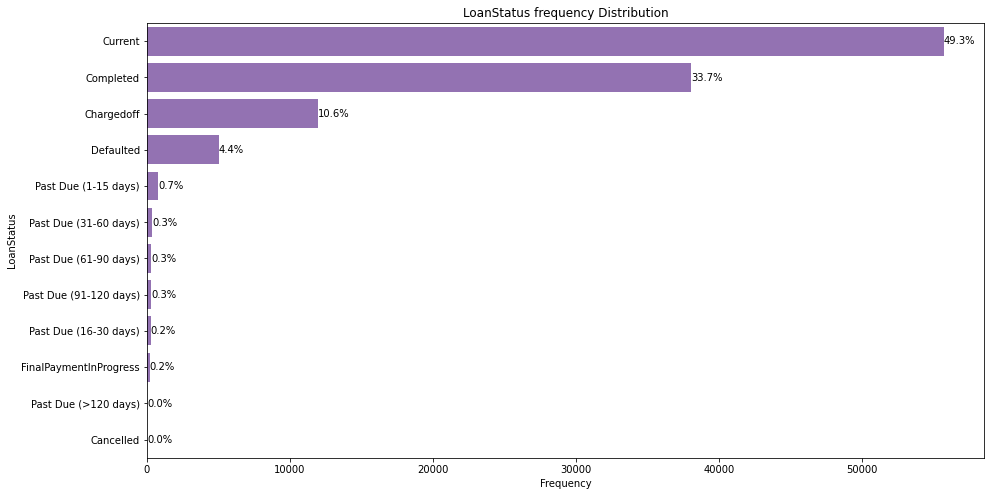

In [30]:
count_plot1('LoanStatus', pal=4)

##### Observation
- Current loans account for 49.3% of the investment
- Completed Loan terms account for 33.7% of the investment
- Charged loans account for  <strong>(see Gloasry section for used words and their meanings)</strong>
- No loan exceeds 4 months (this can be possibly a policy terming loans exceeding 4 months as `Chargedoff`)

#### BorrowerState 

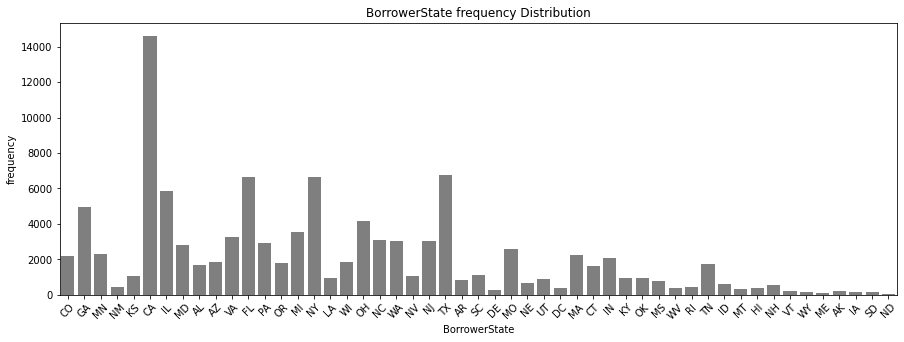

In [31]:
count_plot2('BorrowerState',y=False, pal=7)

- we extract the topten borrower States and explore them closely.

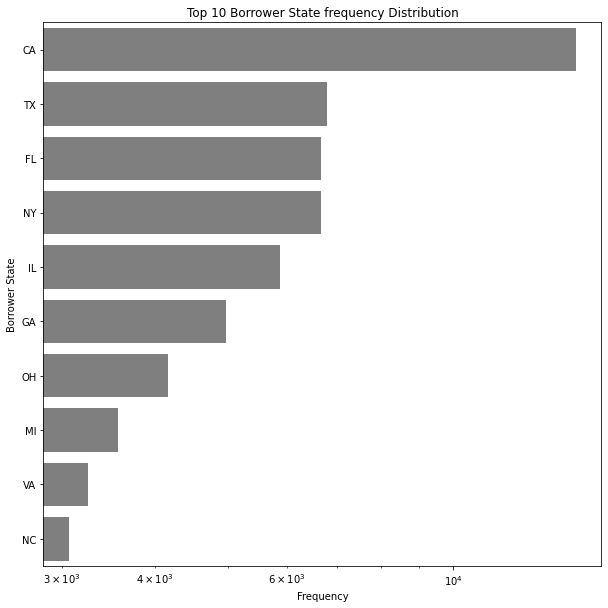

In [32]:
base_color = sb.color_palette()[7]
plt.figure(figsize=[10, 10]);
top_ten_states = ['CA','TX','NY','FL','IL','GA','OH','MI','VA','NC']
state_sub = df_new.loc[df['BorrowerState'].isin(top_ten_states)]

sb.countplot(data = state_sub, y = 'BorrowerState', color = base_color, order = state_sub['BorrowerState'].value_counts().index);
plt.title('Top 10 Borrower State frequency Distribution');
plt.ylabel('Borrower State');
plt.xlabel('Frequency');
plt.xscale('log');

#### Observations
- California has the highest number of loan applicants followed by Texas et`al.

#### Employment status

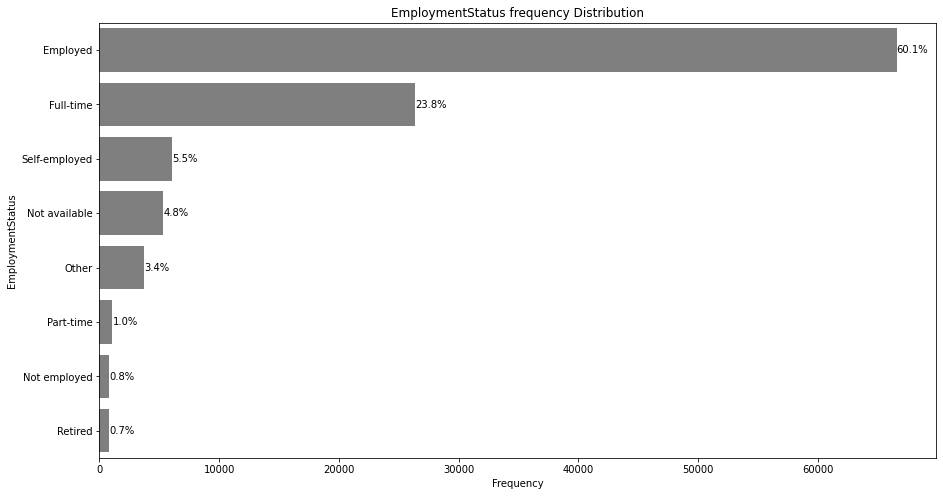

In [33]:
count_plot1('EmploymentStatus', pal=7)

#### Observation
- Most Borrowers are `employed` and `full time`

#### IncomeRange

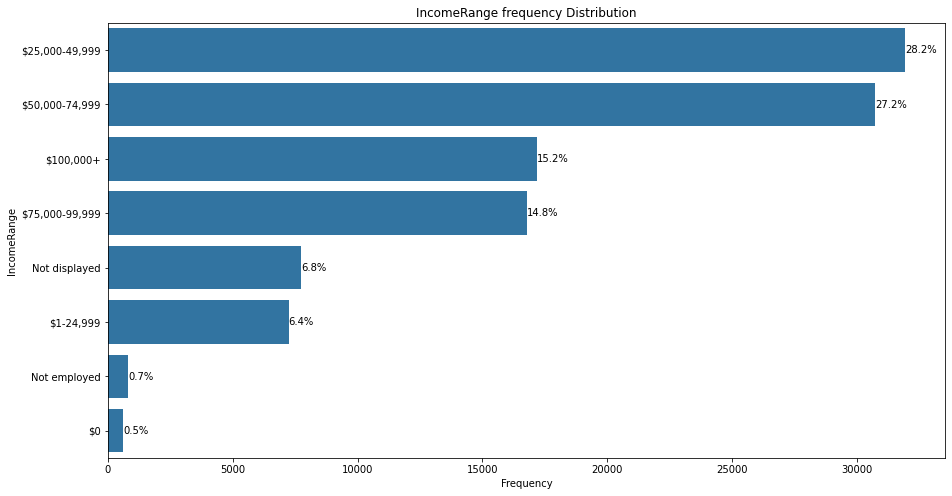

In [34]:
count_plot1('IncomeRange')

#### LoanOriginationQuarter

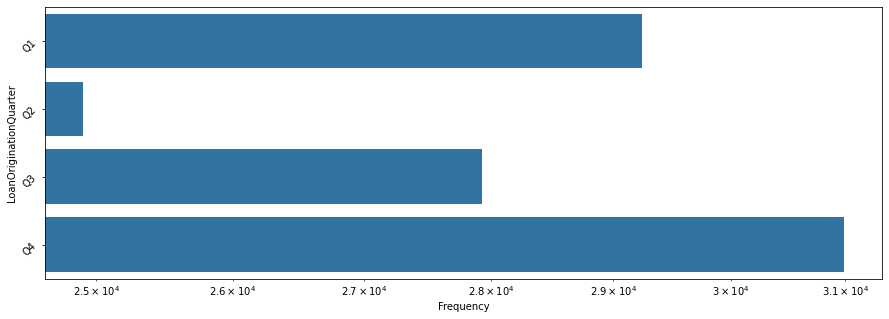

In [35]:
count_plot2('LoanOriginationQuarter')
plt.xscale('log')

#### Observations
- Most loans are taken in the last quarter
- This pattern could be attributed to the need to celebrate the `yuletide` in Style, and also the need to meet up with the financial demands in the first quarter.

#### LoanOriginationYear

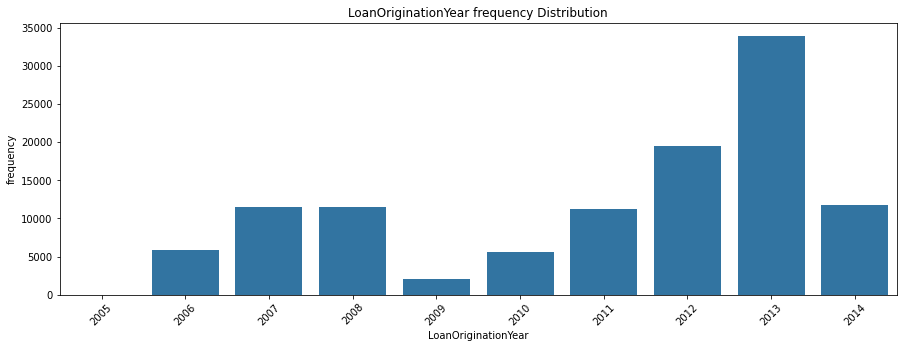

In [36]:
count_plot2('LoanOriginationYear', y=False)

#### Observations
- The number of loan applications increase over time.

#### IsBorrowerHomeowner

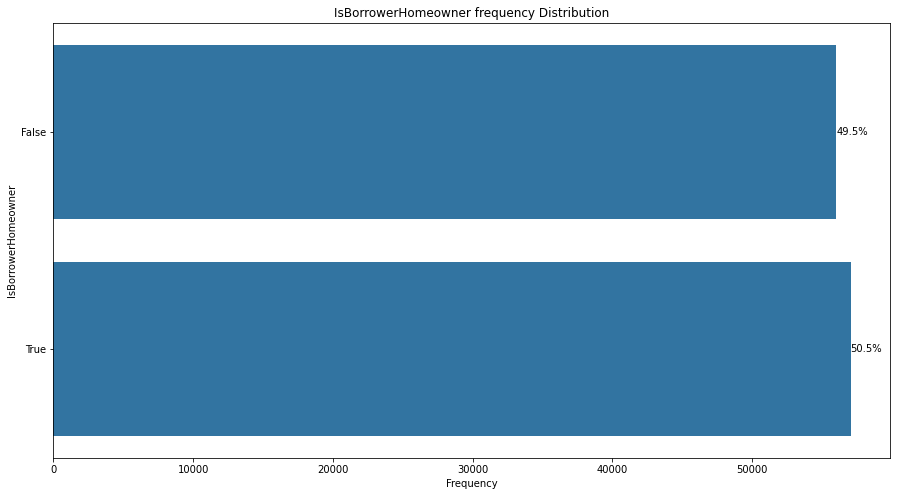

In [37]:
count_plot1('IsBorrowerHomeowner')

#### Observations
- The values are evenly split between Home Owners and those who are not, hence no evidence of any relationship `for now`.

#### Occupation (top ten Occupations on the Loan client listing)

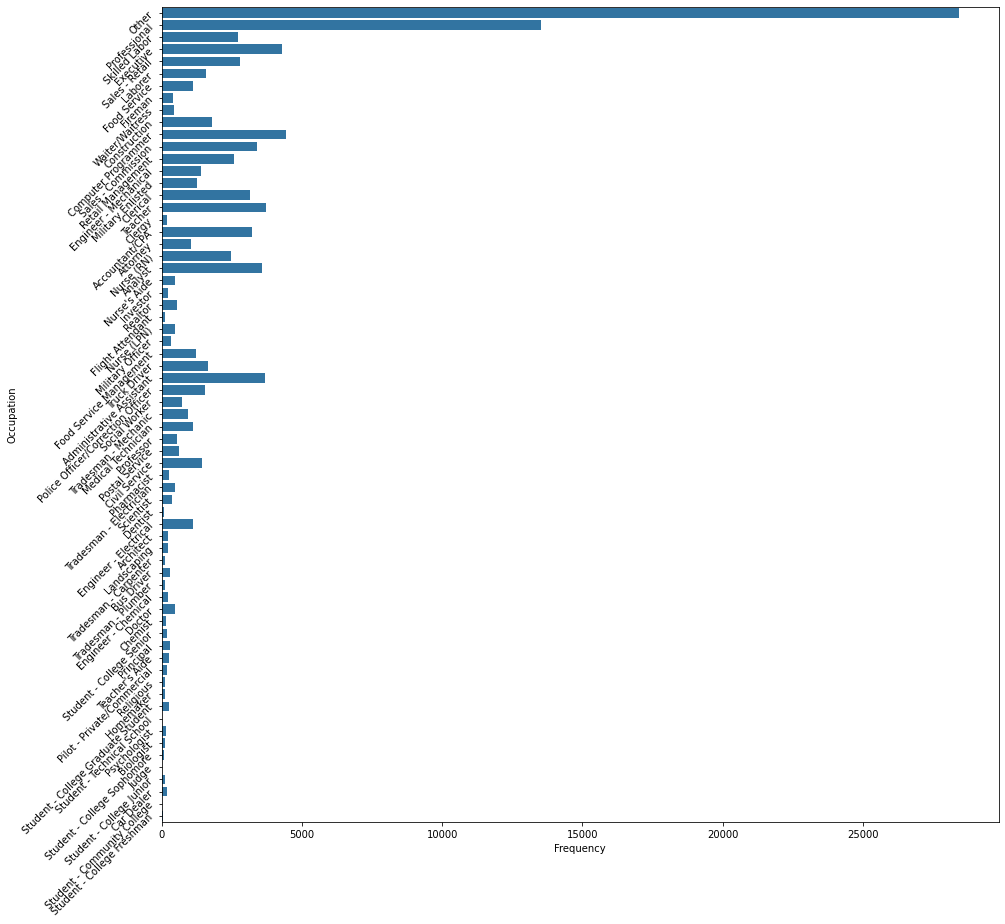

In [38]:
count_plot2('Occupation', cord=(15,15))

- we take the top ten Occupations and explore them closer

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Computer Programmer'),
  Text(1, 0, 'Executive'),
  Text(2, 0, 'Teacher'),
  Text(3, 0, 'Administrative Assistant'),
  Text(4, 0, 'Analyst'),
  Text(5, 0, 'Sales - Commission'),
  Text(6, 0, 'Accountant/CPA'),
  Text(7, 0, 'Clerical'),
  Text(8, 0, 'Sales - Retail'),
  Text(9, 0, 'Skilled Labor')])

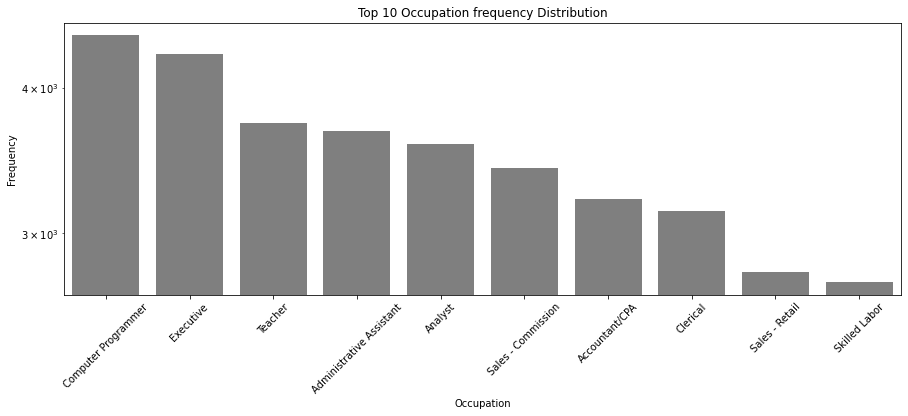

In [39]:
base_color = sb.color_palette()[7]
plt.figure(figsize=[15, 5]);
top_ten_occupation = ['Computer Programmer','Executive','Teacher','Administrative Assistant','Analyst','Sales - Commission','Accountant/CPA','Clerical','Sales - Retail','Skilled Labor']
occupation_sub = df_new.loc[df['Occupation'].isin(top_ten_occupation)]

sb.countplot(data = occupation_sub, x = 'Occupation', color = base_color, order = occupation_sub['Occupation'].value_counts().index);
plt.title('Top 10 Occupation frequency Distribution');
plt.xlabel('Occupation');
plt.ylabel('Frequency');
plt.yscale('log');
plt.xticks(rotation=45)

#### Observations
- We can see Programmers topping this chart with executives following suit.
- This are also some of the highest paid workers on a global scale.
- This could be also associated to the need to multiply wealth by some of the highest earners.

#### `ListingCategory (numeric)`

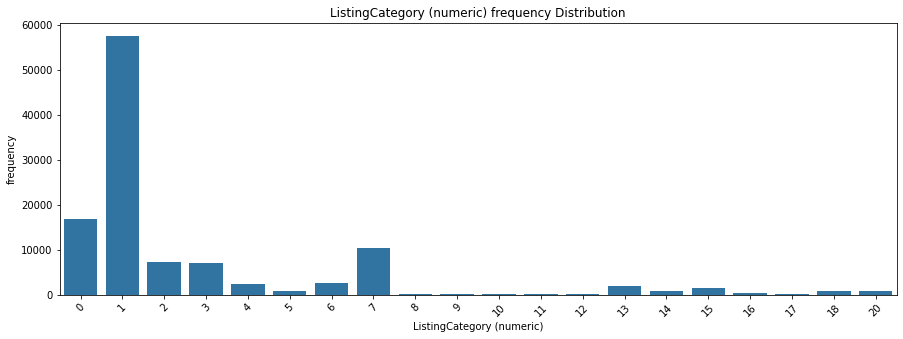

In [40]:
count_plot2('ListingCategory (numeric)', y=False)

#### Observations
- Category 1 (Debt Consolidation) accounts for most listings followed by 2&& 3
- This could imply favourable loan conditions from `Prosper`.

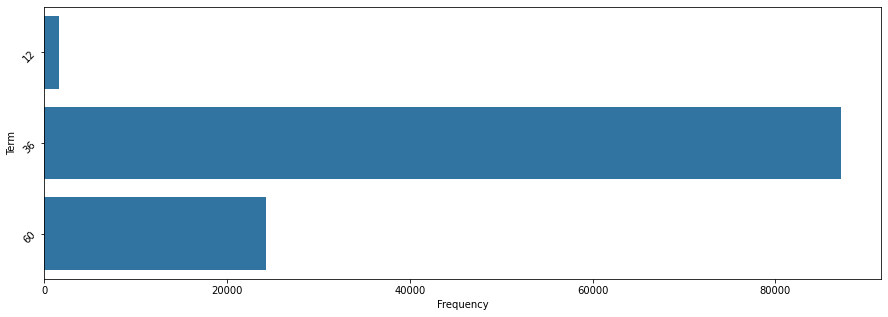

In [41]:
count_plot2('Term')

In [42]:
def dist_plot(col_name):
    plt.figure(figsize=(15,5))
    sb.distplot(df_new[f'{col_name}'], kde=False)
    plt.title(f'{col_name}')
    plt.xlabel(f'{col_name}')
    plt.ylabel('frequency')

#### LoanOriginalAMount

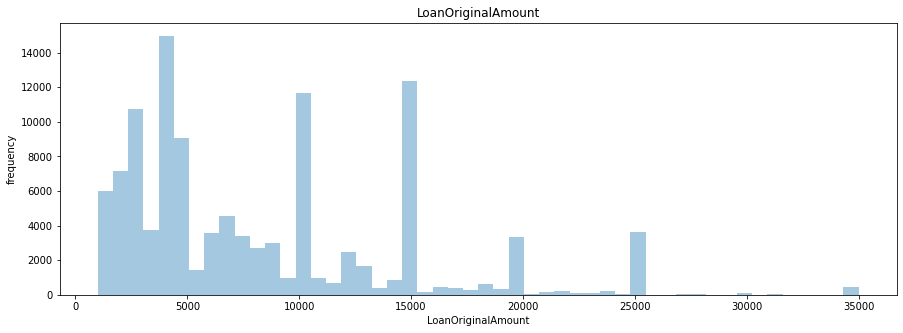

In [43]:
dist_plot('LoanOriginalAmount')

#### Observations
- The Loans are in majorly in multiples of ``$5000``
- This pattern could be psycological as most of the loans exceeding `$5000` are majorly in multiples of `$5000`

#### DebtToIncomeRatio

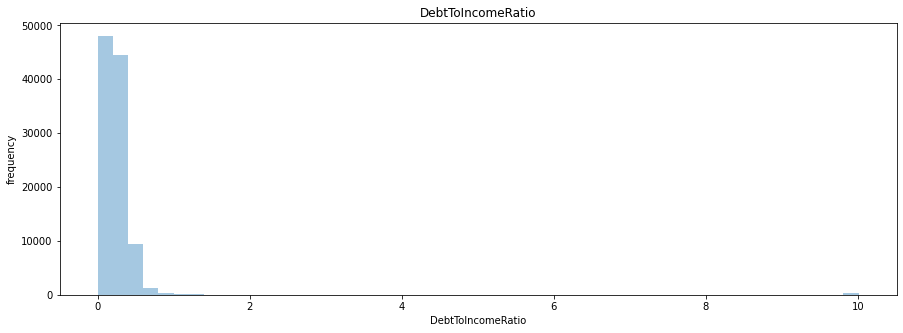

In [44]:
dist_plot('DebtToIncomeRatio')

#### Observations
- This distribution is rightly skewed which indicates most loans not exceeding `100%` of their Income.

#### MonthlyLoanPayment

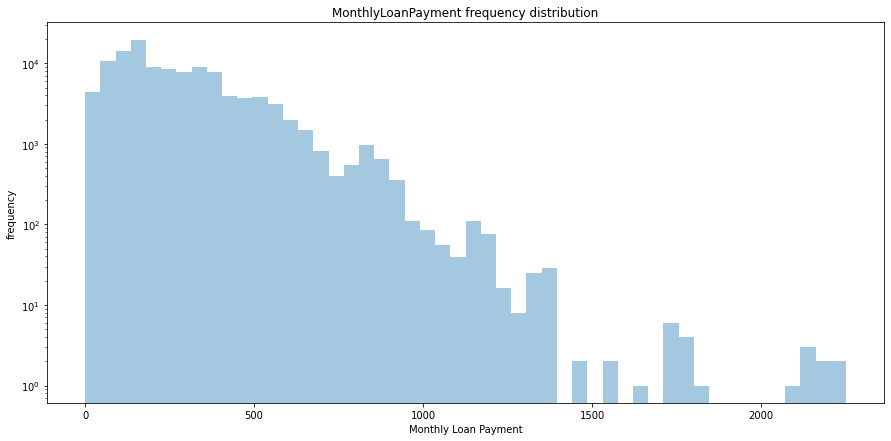

In [45]:
plt.figure(figsize=(15,7))
sb.distplot(df_new['MonthlyLoanPayment'], kde=False)
plt.title('MonthlyLoanPayment frequency distribution')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('frequency')
plt.yscale('log')

#### Observations
- Monthly Loan Payments fall between `$0` to `$500`, with about 200000+ clients paying less than `$250` monthly. 

#### BorrowerApr

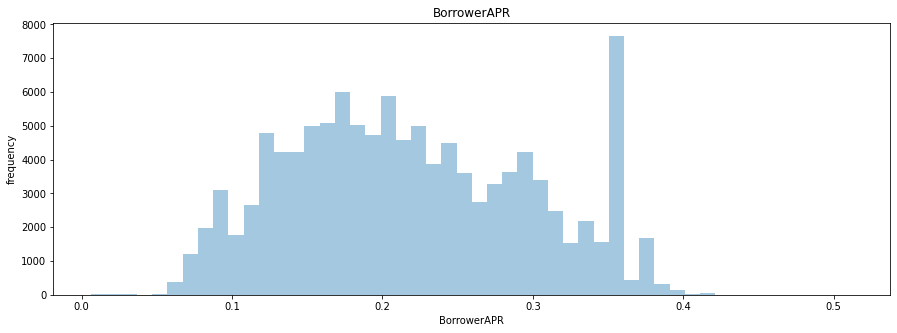

In [46]:
dist_plot('BorrowerAPR')

#### Univariate Exploration Observations
- This distribution is of the similitude of a normally distributed data, with most `BorrowerAPR` values between `0.15` and `0.3`

### Bivariate Exploration

- <strong>violin plots:</strong> categorical vs quantitative plots.
- <strong>Scatterplots:</strong> for quantitative variables vs quantitative variables.

#### plots:
 - EmploymentStatus vs LoanOriginationAmount
 - LoanOriginationAmount vs LoanStatus
 - Occupation vs LoanAmount

<strong>QOI:</strong> what the relationship between `IncomeRange` and `LoanOriginationQuarter`

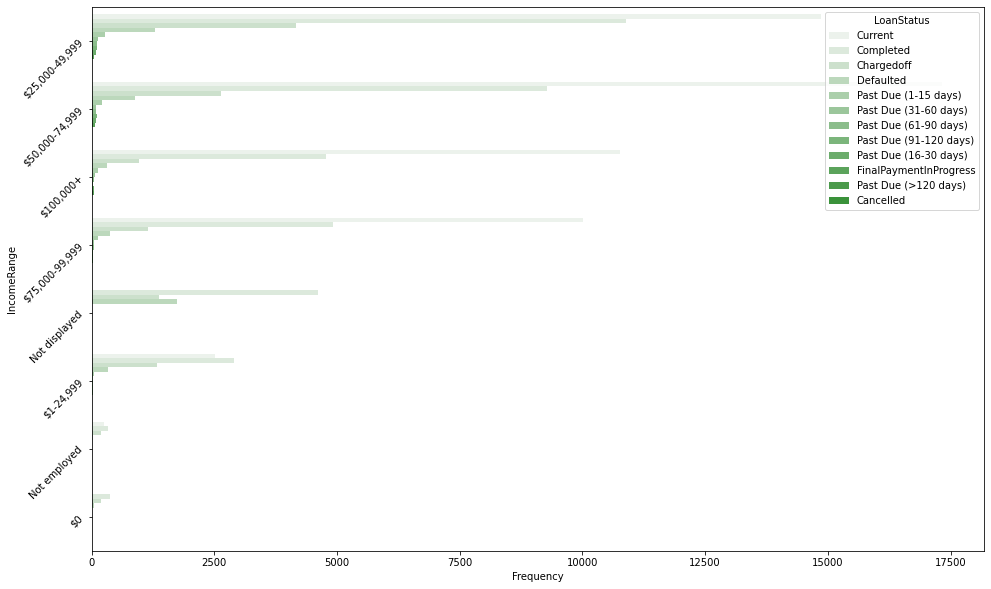

In [82]:
count_plot2('IncomeRange', hu='LoanStatus', cord=(16,10), y=True, pal=2)

#### Observations
- High earners are usually associated with good performing loans.
- Summarily;
    - `IncomeRange` affects loan performance (`LoanStatus`).

<strong>QOI: </strong> What is the relationship between `Loan Status` and `Home Ownership`

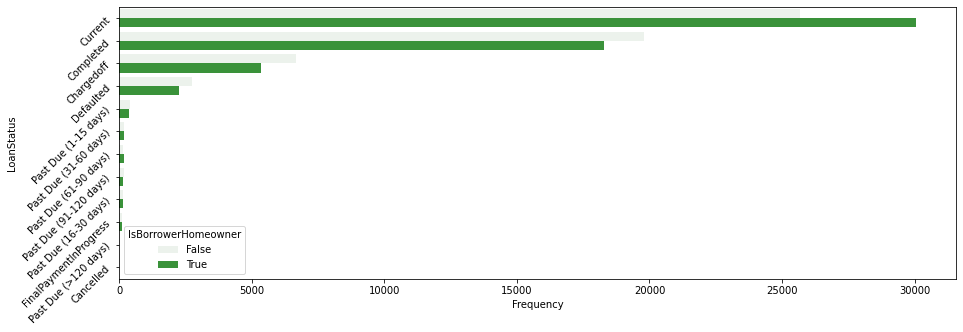

In [48]:
count_plot2('LoanStatus', hu='IsBorrowerHomeowner', pal=2)

#### Observations
- There is no clear evidence that Home ownership affects `Loan Status`.

<strong>QOI: </strong> What is the Relationship between `Loan Status`, and `CreditGrade`.

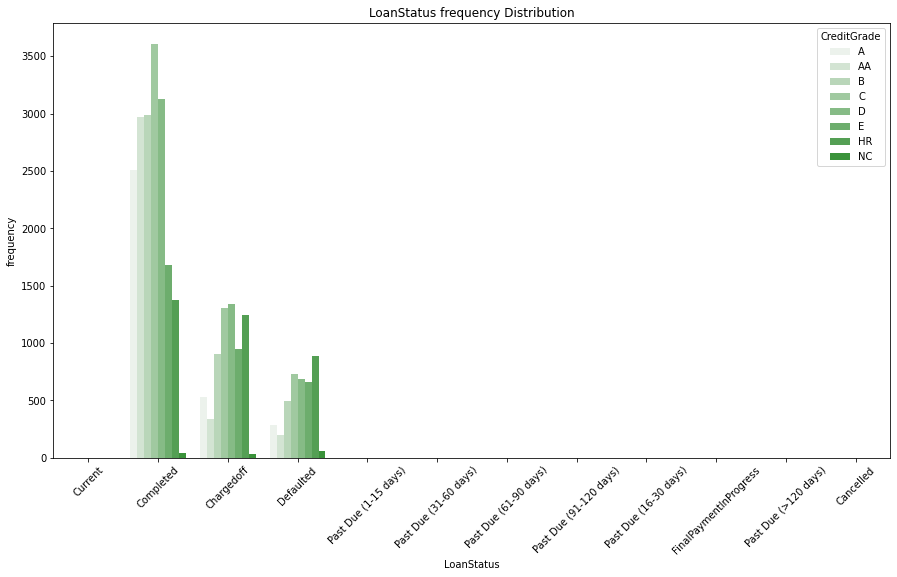

In [49]:
count_plot2('LoanStatus', hu='CreditGrade', pal=2, cord=(15,8), y=False)

##### Observations
- `Completed` Loans range majorly between `AA` and `D` Grade, with with a mode Grade of `C`.
- `Charged off` and `Defaulted` Loans have a similar distribution with mode Grades of `D` and `C` respectively.
- Summarily, `CreditGrade` affects loan performance and is an indicator of loan performance over the years.

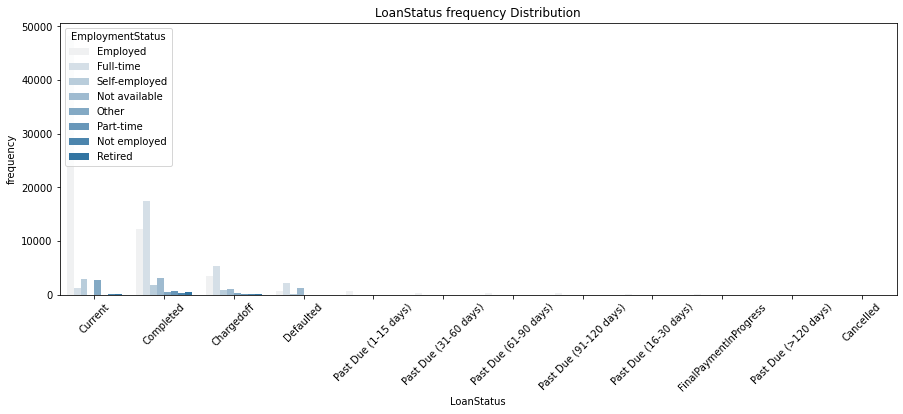

In [50]:
count_plot2('LoanStatus', hu='EmploymentStatus', y=False)

<strong>QOI: </strong> Whats is the relationship between `LoanStatus` and `Term`.

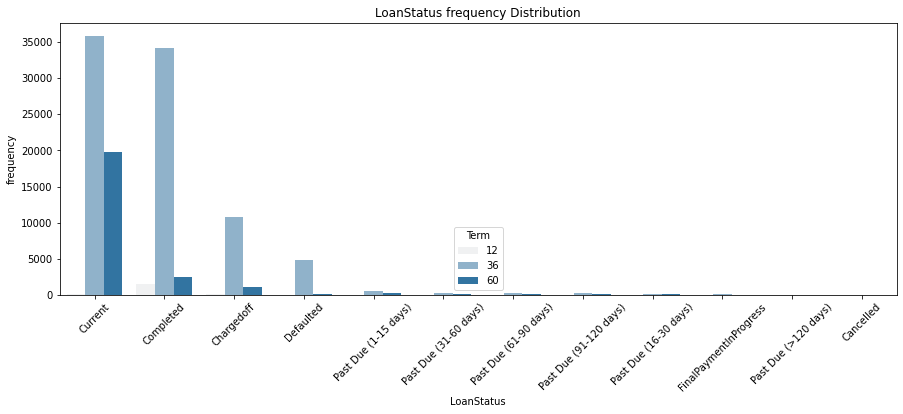

In [51]:
count_plot2('LoanStatus', hu='Term', y=False)

#### Observations
- Despite a significant portio of the loans being longterm, there is no clear evidence of loan `Term` affecting `Loan Status`.

#### Observations (qualitative vs Qualitative analysis)
- `IncomeRange`, `CreditGrade`, `EmploymentStatus` affect loan performance.
- However, home ownership (`IsBorrowerHomeOwner`) and `Term` have no pronounced effect on Loan performance (`LoanStatus`).

#### Quantitative Vs Qualitative exploration

In [63]:
'''
violin plot
    args
        df: data
        X: variable for X axis
        Y: variable for Y axis
        cord: cordinates for dimension of plot
        hu: for an additional category
'''    
def violin(df, X, Y, cord, hu=None):
    plt.figure(figsize=cord)
    sb.violinplot(data=df, x=X, y=Yn, hue=hu)
    plt.xticks(rotation=45)
    
def box(df, X, Y, cord, hu=None):
    plt.figure(figsize=cord)
    sb.boxplot(data=df, x=X, y=Y, hue=hu)
    plt.xticks(rotation=45)

# subplot for violin plot and box plot
def boxviolin(df, X,Y,cord, hu=None):
    plt.figure(figsize=cord)
    plt.subplot(1,2,2)
    
    #subplot row=1, column=1
    plt.subplot(1,2,1)
    sb.violinplot(data=df, x=X, y=Y, hue=hu)
    plt.xticks(rotation=45)
    
    #subplot row=1, column=2
    plt.subplot(1,2,2)
    sb.boxplot(data=df, x=X, y=Y, hue=hu)
    plt.xticks(rotation=45)

#### What is the relationship between `LoanOriginalAmount` and `LoanStatus`

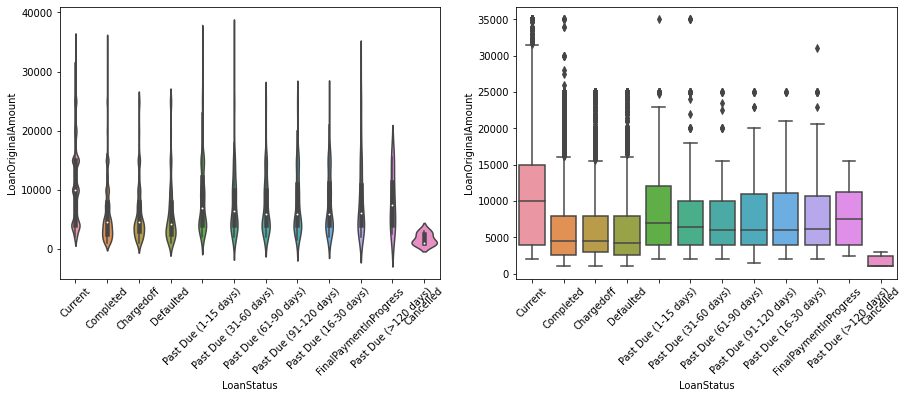

In [64]:
boxviolin(df_new, X='LoanStatus', Y='LoanOriginalAmount', cord=(15,5))

#### Observations
- Current Loans with a median value of `$10000` and a high of `$31000` have higher chances of becoming `Past Due`.
- `Completed`, `Chargedoff`, `Defaulted` loans with a median value of `$5000`, and a high of less than `$10000` have lesser summary statistics than the `Current` loans.
- Summarily, `Current` loans with quartile above the `Completed`, `Chargedoff`, `Defaulted` have higher chances of becoming `Past Due`.
- Summarily;
    - Aside the tendencies of most current loans to becoming past due, there is no clear evidence that `LoanOriginalAmount` affects loan Performance.

#### What is the relationship between `BorrowerAPR` and `LoanStatus`.

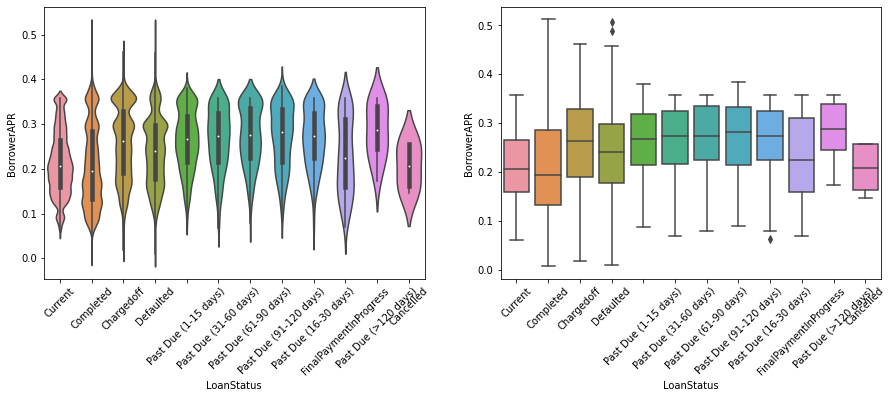

In [65]:
boxviolin(df_new, X='LoanStatus', Y='BorrowerAPR', cord=(15,5))

#### Observation
- `Current` and `Completed` loans are characterised by lower `BorrowerAPR` values, with `Completed` loans having the lowest.
- `FinalPaymentsInProgress` has lower `BorrowerAPR` values.
- It makes sense to see why `Chargedoff`, `Defaulted` and `PastDue({1..30} days)` are characterised by higher values.
- Summarily 
    - Loans with lower `BorrowerAPR` are either completed, current OR with a fraction in Final payment.
    - `Low APR` => `fast payment`, and `high APR` => `extended payment time`.
    - `BorrowerAPR` has pronounced effect on `LoanStatus`.

#### Numeric Bivariate Exploration (quantitative vs quantitative)

#### What is the relationship between `LoanOriginalAmount` and `BorrowerAPR`

<AxesSubplot:xlabel='LoanOriginationYear', ylabel='LoanOriginalAmount'>

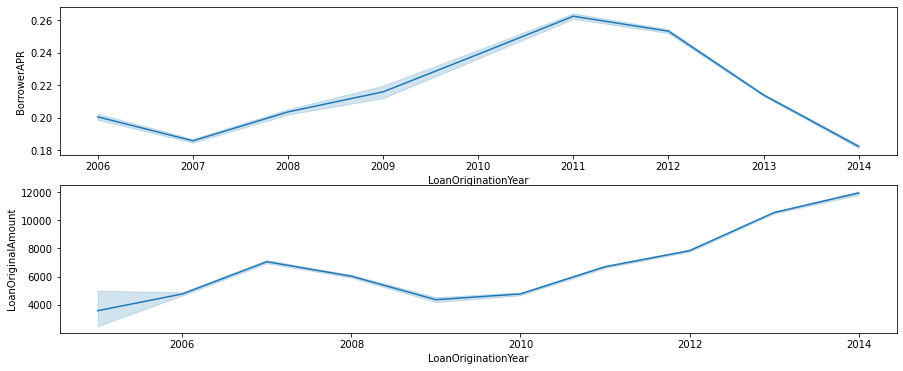

In [55]:
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)

plt.subplot(2,1,1)
sb.lineplot(data=df_new, x="LoanOriginationYear", y="BorrowerAPR")

plt.subplot(2,1,2)
sb.lineplot(data=df_new, x="LoanOriginationYear", y="LoanOriginalAmount")

#### Observations
- `BorrowerAPR` decreases with an increase in `LoanOriginalAmount`.
- More insights on this pattern will be explored in the <strong>multivariate exploration</strong> section.

#### What is the relationship between `BorrowerAPR` and `LoanOriginalAmount`

<AxesSubplot:xlabel='LoanOriginalAmount', ylabel='BorrowerAPR'>

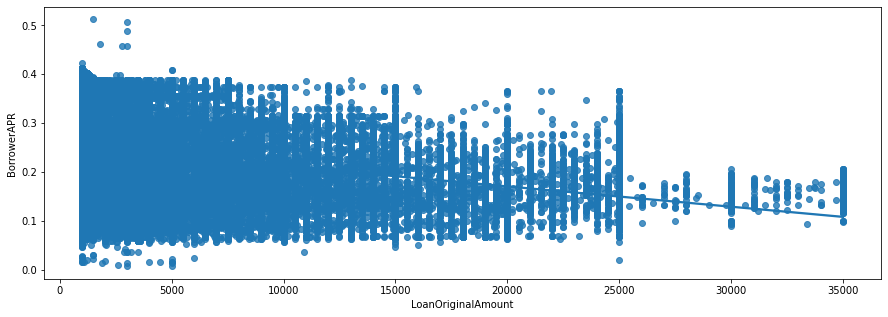

In [56]:
plt.figure(figsize=(15,5))
sb.regplot(data=df_new, x='LoanOriginalAmount', y='BorrowerAPR')

#### Observations
- `LoanOriginalAmount` increases `BorrowerAPR` decreases.

<AxesSubplot:xlabel='LoanOriginalAmount', ylabel='BorrowerAPR'>

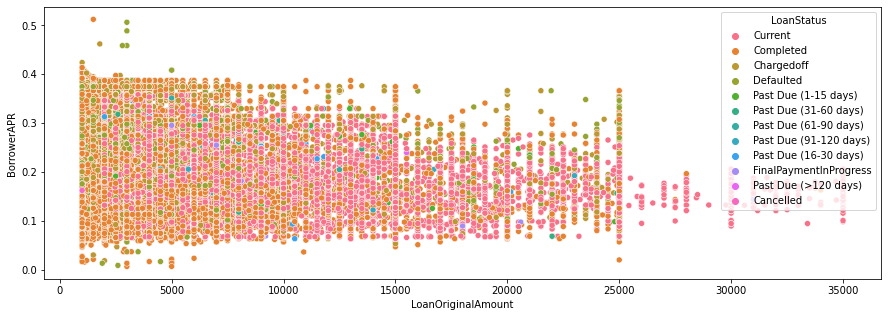

In [57]:
plt.figure(figsize=(15,5))
sb.scatterplot(data=df_new, x='LoanOriginalAmount', y='BorrowerAPR', hue='LoanStatus')

#### Multivariate Eploration

<AxesSubplot:xlabel='LoanOriginationYear', ylabel='LoanOriginalAmount'>

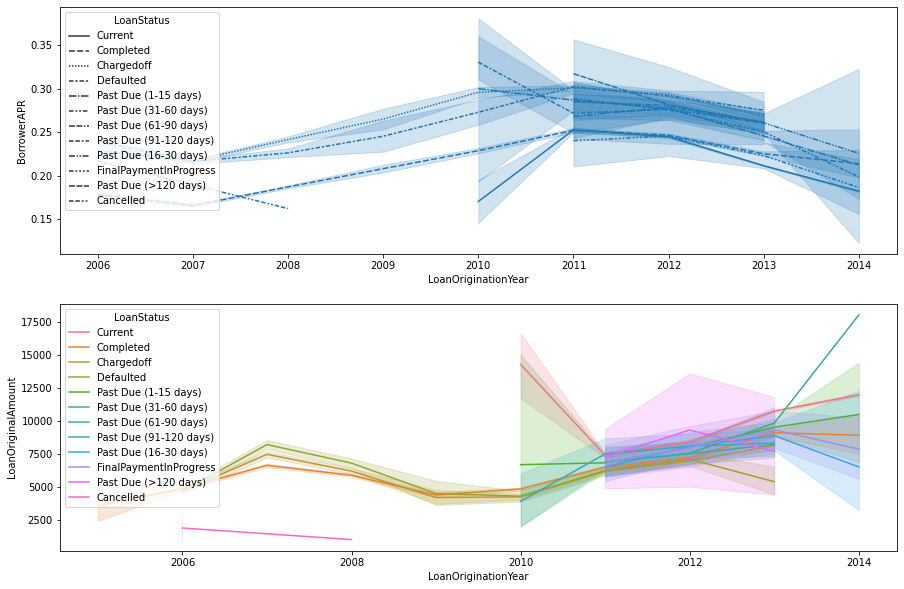

In [58]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)

plt.subplot(2,1,1)
sb.lineplot(data=df_new, x="LoanOriginationYear", y="BorrowerAPR", style='LoanStatus')

plt.subplot(2,1,2)
sb.lineplot(data=df_new, x="LoanOriginationYear", y="LoanOriginalAmount", hue='LoanStatus')

#### Observations
- Here, we see completed loans having lower `BorrowerAPR` along the years
- Charged of loans also have higher `BorrowerAPR`, and
- Current loans characterised by lower `BorrowerAPR`.
- Summarily; 
    - productive loans are characterised by lower `BorrowerAPR` while with loans with worst performance have higher `BorrowerAPR`.
    - Lowering the `BorrowerAPR` would improve the loan performace.
    - The declining BorrowerAPR along the years can be attributed to customer feedback and results of loan performance access

#### What is the relationship between `BorrowerAPR` and `LoanOriginationYear` for `IsBorrowerHomeowner`.
#### What is the relationship between `LoanOriginalAmount` and `LoanOriginationYear` for `IsBorrowerHomeowner`.

Text(0.5, 1.0, 'LoanOriginalAmount vs LoanOriginationYear')

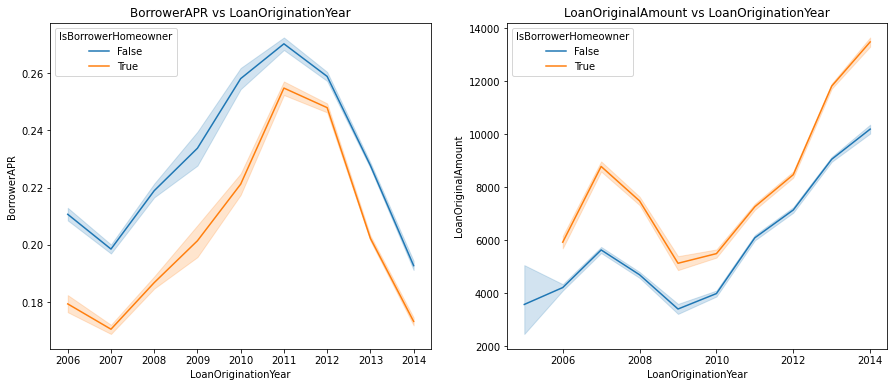

In [75]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,2)

plt.subplot(1,2,1)
sb.lineplot(data=df_new, x="LoanOriginationYear", y="BorrowerAPR", hue='IsBorrowerHomeowner')
plt.title('BorrowerAPR vs LoanOriginationYear')

plt.subplot(1,2,2)
sb.lineplot(data=df_new, x="LoanOriginationYear", y="LoanOriginalAmount", hue='IsBorrowerHomeowner')
plt.title('LoanOriginalAmount vs LoanOriginationYear')

#### Observations
##### `BorrowerAPR`
- `BorrowerAPR` peaks in the year `2011` and declines steadily.
- Home owners have lower `BorrowerAPR`.

##### `LoanOriginalAmount`
- We also see home owner with ho=igher loans amount than those who do not.
- This implies that Home owners have more spending power than those who do not

#### What is the relationship between `BorrowerAPR` and `StatedMonthlyIncome`.

<AxesSubplot:xlabel='StatedMonthlyIncome', ylabel='BorrowerAPR'>

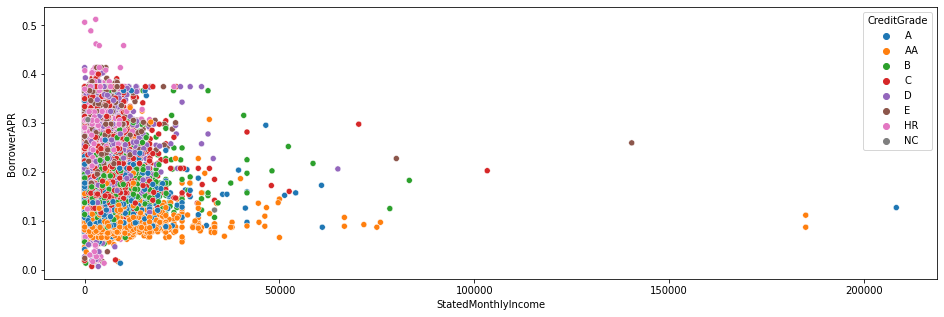

In [60]:
plt.figure(figsize=(16,5))
sb.scatterplot(data=df_new, y='BorrowerAPR', x='StatedMonthlyIncome', hue='CreditGrade')

#### Observations
- High `StatedMonthlyIncome` is associated with low `BorrowerAPR` and low `StatedMothlyIncome` associated with high `APR`.
- Good Credit Rating is associated with low `BorrowerAPR`.

<AxesSubplot:xlabel='LoanOriginalAmount', ylabel='MonthlyLoanPayment'>

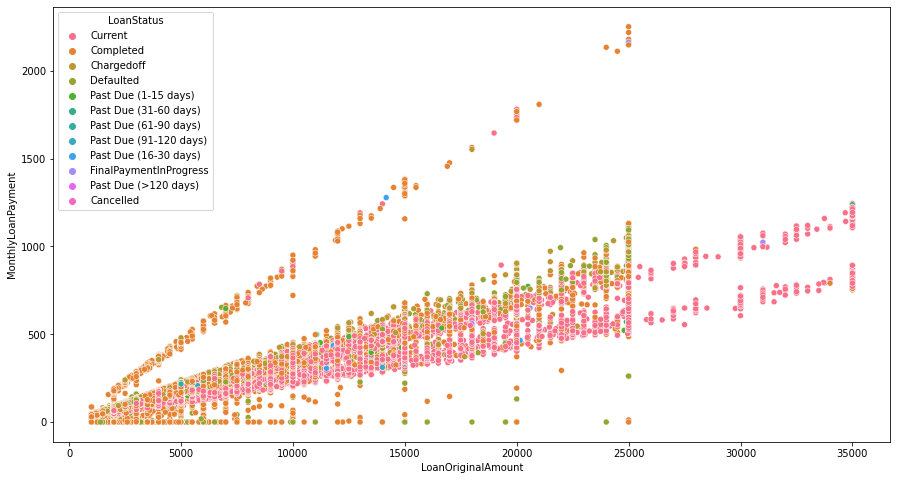

In [61]:
plt.figure(figsize=(15,8))
sb.scatterplot(data=df_new, y='MonthlyLoanPayment', x='LoanOriginalAmount', hue='LoanStatus')

### Overall Summary
#### Univariate exploration
1.  - `Default` loans account for `10.6%` of the loans.
    - `Completed` loans account for `33.7%` of the loans.
    - `Current` loan saccount for 49.3% of the loans.
2.  - California has the highest number of loan applicants with `Texas`, `Florida`, `NewYork`, etc. following suit.
3.  - Employed clients account for 60.1% of the total loan applicants, wit 23.8% working full-time.

4.  - Applicants earning `$(25k - 74999k)` account for `55.4%` while clients earning  `$(75k - 100k+)` account for 30% of the total.
5.  - Most loan are in the fourth and first quarter respectively.
6.  - Most loans were recorded in 2013 with a high of 34000 loans.
7.  - `Home Ownership (IsBorrowerHomeowner`) has no pronounced effect on `loan performance (LoanStatus`).
8.  - `Computer Programmer`, `Executives`, `Teachers`, etc.. are some the major loan applicants
9.  - `Debtconsolidation` accounts for most loan categories.
10. - The loans are najorly longterm with a significant portion having a span of three years.
11. - Loan Amounts are mostly in multiples of `$5000`.
12. - A significant portion of the loan payments fall below `$1000`.
13. - The BorrowerAPR for most loans falls between `0.15` to `0.3`.

#### Bivariate Exploration <br>
#### category vs category
1. - `IncomeRange` affects `LoanStatus`.
2. - `Homeownership` has no effect on `LoanStatus`.
3. - `CreditGrade` is a reflection of previous loan performance `(LoanStatus)`.
4. - `EmploymentStatus` has mild effect on `LoanStatus`.
5. - Loan `Term` has no effect on `LoanStatus`.
#### Numeric vs Category
6. - Despite the tendencies of current loans being `pastdue`, there is no clear statistics showing that `LoanOriginalAmount` has any pronounced effect on `LoanStatus`.
7. - `BorrowerAPR` has significant effect on `LoanStatus`.
#### numeric vs numeric
8. - `BorrowerAPR` decreases with an increase in `LoanOriginalAmount`.
   - `BorrowerAPR` and `LoanOriginalAmount` are negatively correlated.
   - Along the years, `Completed` loans have lower `BorrowerApr` amidst increasing `LoanOriginalAmount`.
   - `Canceled` loans are also characterised by high increasing `LoanOriginalAmount`s and deacreasing `BorrowerAPR`.
#### Multivariate exploration
1. - `MonthlyLoanPayment` and `LoanOriginalAmount` are positively correlated with completed loans hiving a higher correlation coeficient.
2. - Home owners have lower `BorrowerAPR` than those who do not own homes.
3. - Lower `BorrowerAPR` values are associated with better `CreditGrade`s.

<a id='conclude'></a>
## Conclusions

- From our summary, we have that
1. `LoanStatus` is majorly affected by;
    - `IncomeRange`
    - `EmploymentStatus`
    - `CreditGrade`<br>
<br>
2. `BorrowerAPR` is majorly inlfuenced by;
    - `LoanOriginalAmount`
    - Home ownership `IsBorrowerHomeowner`<br>
<br>
3. As observed, home owners have significantly lower `BorrowerAPR`, and high `LoanOriginalAmount` is associated with lower `BorrowerAPR`, this implies that Home owners take significantly higher loans and have a higher purchasing power. This shows that a sense of security plays of spending power.<br>
<br>
4. Categorical variables are largely classifcations based on client psychology, the data suggests that less than `50%` of clients are satisfied with the organisations loans conditions/ structure, this is not to imply poor customer service or the neglect of customer feedback, but could be a result of other factors outside the scope of the variables provided by this data. Thus more categorical variables would help understand client better.

<strong>However, this is a business and should be treated as such.</strong>

<a id='glosary'></a>
## Glosary

#### Charge-off loan
- This means a lender or creditor has written the account off as a loss, and the account is closed to future charges.

#### Default Loan
- This occurs when a borrower fails to pay back a debt according to the initial arrangement.

#### NR
- `Not Reported`, this indicates that an update has not been provided between the lender and Credit Reference Agency for that month. In the eyes of a prospective lender it means that they cannot tell whether a payment was made or missed, so this is a neutral marker.

#### Save data for <strong>explanatory</strong> data visualization

In [62]:
df_new.to_csv('prosper_clean.csv')